In [1]:
%matplotlib inline

import sys
import matplotlib.pyplot as plt
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data.dataloader import DataLoader
sys.path.append("..")
from unet.dataset import CoNSePDataset

/home/dkermany/.local/share/virtualenvs/BoneSegmentation-C6QGg7XR/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dkermany/.local/share/virtualenvs/BoneSegmentation-C6QGg7XR/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/dkermany/.local/share/virtualenvs/BoneSegmentation-C6QGg7XR/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail19maybe_wrap_dim_slowEllb
  warn(f"Failed to load image Python extension: {e}")


In [2]:
transform = A.Compose(
    [
#         A.Resize(height=self.image_size, width=self.image_size),
#         A.Normalize(
#             mean=[0.4690, 0.4456, 0.4062],
#             std=[0.2752, 0.2701, 0.2847],
#             max_pixel_value=255.0
#         ),
        A.RandomCrop(height=256, width=256),
        ToTensorV2()
    ]
)

In [3]:
ds = CoNSePDataset(
    "/home/dkermany/data/CoNSeP/Test/Images",
    "/home/dkermany/data/CoNSeP/Test/Labels",
    image_ext="png",
    mask_ext="mat",
    transform=transform,
)

loader = DataLoader(
    ds,
    batch_size=8,
    shuffle=False,
    num_workers=0,
    pin_memory=False,
)
data, targets = next(iter(loader))


stff


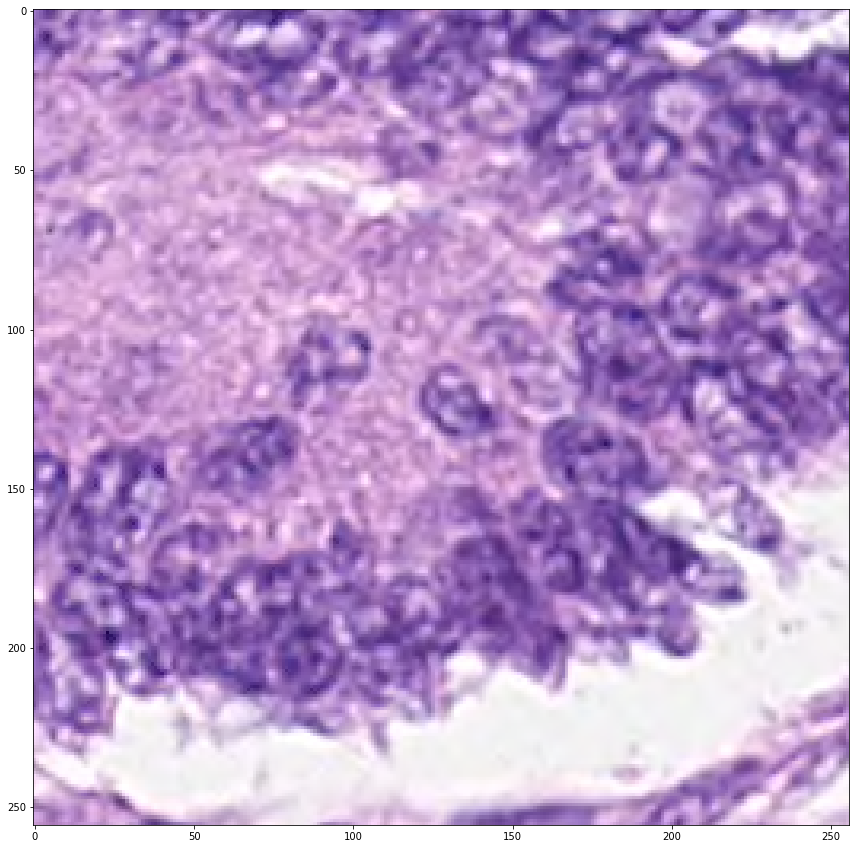

In [4]:
plt.figure(figsize=(15,15))
plt.imshow(data[0].permute(1, 2, 0).int())

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])


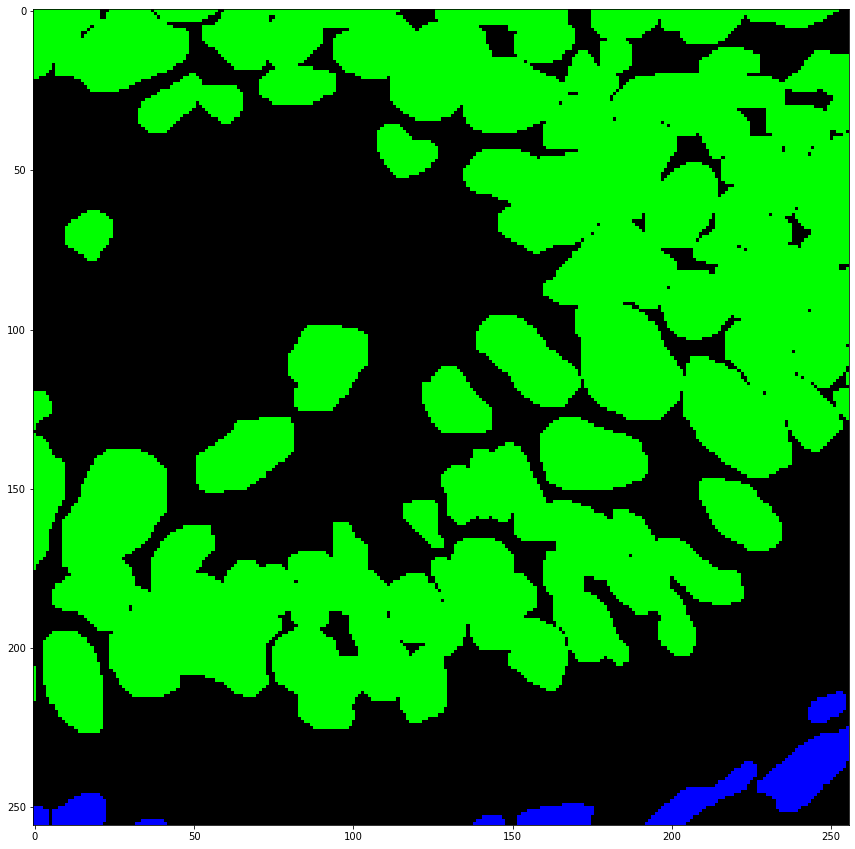

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(targets[0].permute(1, 2, 0))
print(targets[0].shape)
print(data[0].shape)

In [6]:
# print(data.shape)
# print(targets.shape)
# torch.unique(targets)